# DATA WRANGLING PROJECT

This project involves gathering data from a variety of sources and in a variety of formats. Then assess their quality, tidiness, then clean them. The dataset is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. Here three files are explored in the data wrangling and analysis process.

## Gathering Datasets

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### First dataset - WeRateDog Twitter Archive

In [2]:
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

### Second dataset - Tweet Image Predictions

In [3]:
# Download file using Requests library via URL provided 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
# Save the file
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
# Read the saved file
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Third dataset - Twitter API

In [5]:
# Dowload file Using Request library through URL on Udacity platform 
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)
with open('tweet-json.txt', mode = 'wb') as file:
    file.write(response.content)

In [6]:
df_list = []
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()
for line in lines:
    parsed_json = json.loads(line)
    df_list.append({'tweet_id': parsed_json['id'],'retweet_count': parsed_json['retweet_count'],
                    'favorite_count': parsed_json['favorite_count'],'date_time': pd.to_datetime(parsed_json['created_at'])})
    
    
        
tweet_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'date_time'])

tweet_json.head()

,tweet_id,retweet_count,favorite_count,date_time
0,892420643555336193,8853,39467,2017-08-01 16:23:56+00:00
1,892177421306343426,6514,33819,2017-08-01 00:17:27+00:00
2,891815181378084864,4328,25461,2017-07-31 00:18:03+00:00
3,891689557279858688,8964,42908,2017-07-30 15:58:51+00:00
4,891327558926688256,9774,41048,2017-07-29 16:00:24+00:00


## Assessing Dataset

- The dataset will be visually and programmatically assessed so as to identify data quality issues and tidines issues.

### - Twitter Archive

In [7]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
twitter_archive.duplicated().sum()

0

In [11]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [12]:
twitter_archive.tweet_id.duplicated().sum()

0

In [13]:
twitter_archive.tweet_id.duplicated().sum()

0

In [14]:
twitter_archive.rating_numerator.duplicated()

0       False
1        True
2       False
3        True
4        True
        ...  
2351     True
2352     True
2353     True
2354     True
2355     True
Name: rating_numerator, Length: 2356, dtype: bool

In [15]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [16]:
twitter_archive.rating_denominator.duplicated()

0       False
1        True
2        True
3        True
4        True
        ...  
2351     True
2352     True
2353     True
2354     True
2355     True
Name: rating_denominator, Length: 2356, dtype: bool

In [17]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [18]:
twitter_archive.name.duplicated().sum()


1399

In [19]:
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Major        1
BeBe         1
Beya         1
Raphael      1
Marq         1
Name: name, Length: 957, dtype: int64

In [20]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [21]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [22]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [23]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

### - Tweet Image Predictions 

In [24]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [25]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
image_predictions.duplicated().sum()

0

In [28]:
image_predictions.tweet_id.duplicated().sum()

0

In [29]:
image_predictions.jpg_url.duplicated().sum()

66

In [30]:
image_predictions.img_num.duplicated().sum()

2071

In [31]:
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
silky_terrier           1
scorpion                1
pot                     1
sandbar                 1
platypus                1
Name: p1, Length: 378, dtype: int64

In [32]:
image_predictions.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
hotdog                  1
wombat                  1
tray                    1
hair_spray              1
breakwater              1
Name: p2, Length: 405, dtype: int64

In [33]:
image_predictions.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
goldfish               1
guillotine             1
goose                  1
park_bench             1
bib                    1
Name: p3, Length: 408, dtype: int64

### - Twitter API Data

In [34]:
tweet_json

,tweet_id,retweet_count,favorite_count,date_time
0,892420643555336193,8853,39467,2017-08-01 16:23:56+00:00
1,892177421306343426,6514,33819,2017-08-01 00:17:27+00:00
2,891815181378084864,4328,25461,2017-07-31 00:18:03+00:00
3,891689557279858688,8964,42908,2017-07-30 15:58:51+00:00
4,891327558926688256,9774,41048,2017-07-29 16:00:24+00:00
...,...,...,...,...
2349,666049248165822465,41,111,2015-11-16 00:24:50+00:00
2350,666044226329800704,147,311,2015-11-16 00:04:52+00:00
2351,666033412701032449,47,128,2015-11-15 23:21:54+00:00
2352,666029285002620928,48,132,2015-11-15 23:05:30+00:00


In [35]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2354 non-null   int64              
 1   retweet_count   2354 non-null   int64              
 2   favorite_count  2354 non-null   int64              
 3   date_time       2354 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(3)
memory usage: 73.7 KB


In [36]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [37]:
tweet_json.duplicated().sum()

0

In [38]:
tweet_json.tweet_id.duplicated().sum()

0

In [39]:
tweet_json.retweet_count.duplicated().sum()

630

In [40]:
tweet_json.favorite_count.duplicated().sum()

347

### Quality Issues

#### Twitter archive data 

- retweeted_status_timestamp, timestamp should be datetime instead of object. +0000 should be removed
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id are expected to be integers/strings instead of float.
- Only original tweets are needed, no reply and retweets.
- Some post are not dogs.
- Invalid values in the numerator and denominator rating columns.
- In the name and stages columns some names are missing. They are showing as 'None'.

#### Image predictions data

- Some post are not dogs e.g. peacock, cloak, etc
- Refining p1, p2 and p3 columns and confidence associated with them by combining. This is because confident prediction is mostly needed for this analysis.
- jpg url duplicates
- Inconsistent capitalization in the prediction column.


#### Twitter API

- date_time should have datatime datatype and not string

### Tidiness Issues

- Twitter_archive: doggo, floofer, pupper, puppo are all stages of dog, should be in one column.
- All the three datasets should be combined into one.

## Cleaning Dataset

In [41]:
#Making copies of all the data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

In [42]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Resolving the quality issues

### 1. Twitter archive: retweeted_status_timestamp, timestamp should be datetime instead of object. +0000 should be removed

#### Define

Remove +00:00 from the timestamp column and convert the timestamp from str to datetime using pd.to_datetime.

#### Code

In [43]:
twitter_archive_clean.timestamp = twitter_archive_clean.timestamp.str[:-6]

# Convert to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [44]:
twitter_archive_clean.timestamp

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
               ...        
2351   2015-11-16 00:24:50
2352   2015-11-16 00:04:52
2353   2015-11-15 23:21:54
2354   2015-11-15 23:05:30
2355   2015-11-15 22:32:08
Name: timestamp, Length: 2356, dtype: datetime64[ns]

### 2. Only original tweets are needed, no reply and retweets.

#### Define

- Delete the retweets and reply ratings.
- Using isnull() function to search for where there are NaN values under retweet and reply.

#### Code

In [45]:
# To delete retweets in the dataset
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

# To delete replies in the dataset
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]

#### Test

In [46]:
twitter_archive_clean.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2097 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2097 non-null   datetime64[ns]
 4   source                      2097 non-null   object        
 5   text                        2097 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2094 non-null   object        
 10  rating_numerator            2097 non-null   int64         
 11  rating_denominator          2097 non-null   int64       

### 3. Twitter Archive: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id are expected to be integers/strings instead of float. Since they are related to retweet and reply, they can all be dropped.

#### Define

All the identified four columns should be dropped. retweeted_status_timestamp should also be dropped since it is not needed.

#### Code

In [47]:
#dropping columns within the dataframe
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id',
                            'retweeted_status_user_id', 'retweeted_status_timestamp'],axis=1)

#### Test

In [48]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   int64         
 6   rating_denominator  2097 non-null   int64         
 7   name                2097 non-null   object        
 8   doggo               2097 non-null   object        
 9   floofer             2097 non-null   object        
 10  pupper              2097 non-null   object        
 11  puppo               2097 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


### 4. Image prediction: Some post are not dogs e.g. peacock, cloak, etc. This is applicable to other datasets.

#### Define

- Check for posts that are not dog.

#### Code

In [49]:
# shape check before cleaning
print(image_predictions_clean.shape)
print(twitter_archive_clean.shape)
print(tweet_json_clean.shape)

(2075, 12)
(2097, 12)
(2354, 4)


In [50]:
# Filtering posts that are not dogs 
image_predictions_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id
drop_list = image_predictions_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id

# Dropping rows with specific tweet_id contained in the drop_list for the three datasets
image_predictions_clean = image_predictions_clean[~image_predictions_clean.tweet_id.isin(drop_list)]
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(drop_list)]
tweet_json_clean = tweet_json_clean[~tweet_json_clean.tweet_id.isin(drop_list)]

#### Test

In [51]:
#shape check after cleaning
print(image_predictions_clean.shape)
print(twitter_archive_clean.shape)
print(tweet_json_clean.shape)

(1751, 12)
(1792, 12)
(2031, 4)


### 5. Twitter Archive: The denominator columns have some invalid values. 

- Starting with the cleaning of the denominator values.
- According to the project introduction, the ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent.". This implies that ideally, the numerator values should be greater or equal to 10.

#### Define

- Checking the various values in the rating_denominator and their counts.
- Check the entried whose denominators are not 10.

#### Code

In [52]:
# denominator counts
twitter_archive_clean.rating_denominator.value_counts()

10     1776
50        3
11        2
80        2
2         1
7         1
20        1
40        1
70        1
90        1
110       1
120       1
150       1
Name: rating_denominator, dtype: int64

In [53]:
# Create a dataframe with few columns
df_abnormal_rating = twitter_archive_clean[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

# Filtering rating_denominator that are not equal to 10
df_abnormal_denominator = df_abnormal_rating.query('rating_denominator != 10')

# Setting the Column Width
pd.set_option('max_colwidth', None)
df_abnormal_denominator

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50


In [54]:
# The right ratings will be assigned by reading through the text as shown above. 
# The error in the rating is as a result of multiple dogs. Made a second confirmation by checking through the given url. 


# tweet_id: 820690176645140481 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 820690176645140481, 'rating_numerator'] = 12
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 820690176645140481, 'rating_denominator'] = 10

# tweet_id: 810984652412424192 --- Fund raising for the dog. Thus, should be removed
twitter_archive_clean = twitter_archive_clean.drop([516])

# tweet_id: 775096608509886464
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 775096608509886464, 'rating_numerator'] = 14
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 775096608509886464, 'rating_denominator'] = 10

# tweet_id: 758467244762497024 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 758467244762497024, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 758467244762497024, 'rating_denominator'] = 10

# tweet_id: 740373189193256964 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964, 'rating_numerator'] = 14
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964, 'rating_denominator'] = 10

# tweet_id: 722974582966214656 
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 722974582966214656, 'rating_numerator'] = 13
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 722974582966214656, 'rating_denominator'] = 10

# tweet_id: 716439118184652801
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 716439118184652801, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 716439118184652801, 'rating_denominator'] = 10

# tweet_id: 713900603437621249 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 713900603437621249, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 713900603437621249, 'rating_denominator'] = 10

# tweet_id: 710658690886586372 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 710658690886586372, 'rating_numerator'] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 710658690886586372, 'rating_denominator'] = 10

# tweet_id: 709198395643068416 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 709198395643068416, 'rating_numerator'] = 9
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 709198395643068416, 'rating_denominator'] = 10

# tweet_id: 704054845121142784 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 704054845121142784, 'rating_numerator'] = 12
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 704054845121142784, 'rating_denominator'] = 10

# tweet_id: 697463031882764288 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 697463031882764288, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 697463031882764288, 'rating_denominator'] = 10

# tweet_id: 686035780142297088 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 686035780142297088, 'rating_numerator'] = 2
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 686035780142297088, 'rating_denominator'] = 10

# tweet_id: 684225744407494656 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 684225744407494656, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 684225744407494656, 'rating_denominator'] = 10

# tweet_id: 684222868335505415 - Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 684222868335505415, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 684222868335505415, 'rating_denominator'] = 10

# tweet_id: 682962037429899265 --- 
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 682962037429899265, 'rating_numerator'] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 682962037429899265, 'rating_denominator'] = 10

# tweet_id: 682808988178739200
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 682808988178739200, 'rating_numerator'] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 682808988178739200, 'rating_denominator'] = 10

# tweet_id: 677716515794329600 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 677716515794329600, 'rating_numerator'] = 12
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 677716515794329600, 'rating_denominator'] = 10

# tweet_id: 675853064436391936
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 675853064436391936, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 675853064436391936, 'rating_denominator'] = 10

# tweet_id: 666287406224695296
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 666287406224695296, 'rating_numerator'] = 9
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 666287406224695296, 'rating_denominator'] = 10

#### Test

In [55]:
twitter_archive_clean.rating_denominator.value_counts()

10    1791
Name: rating_denominator, dtype: int64

### 6. Twitter Archive: The Numerator columns have some invalid values. 

#### Define

- Checking the various values in the rating_numerator and their counts.

#### Code

In [56]:
# Numerator counts
twitter_archive_clean.rating_numerator.value_counts()

12    464
10    379
11    379
13    256
9     136
8      71
7      31
14     27
6      16
5      15
4       6
3       5
2       2
27      1
0       1
26      1
75      1
Name: rating_numerator, dtype: int64

In [57]:
# Querying the numerator by looking into the data

# rating_numerator 27, 0, 26, 75
df_abnormal_rating.query('rating_numerator == 27 or rating_numerator == 0 or rating_numerator == 26 or rating_numerator == 75')

,tweet_id,text,rating_numerator,rating_denominator
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [58]:
#working on the numerator value

# tweet_id: 835152434251116546 ---- Right rating confirmed through the post link
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 835152434251116546, 'rating_numerator'] = 11

# tweet_id: 786709082849828864 ---- Float error
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 786709082849828864, 'rating_numerator'] = 9.75

# tweet_id: 778027034220126208 ---- Float error
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 778027034220126208, 'rating_numerator'] = 11.27

# tweet_id: 680494726643068929 ---- Float error
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 680494726643068929, 'rating_numerator'] = 11.26

#### Test

In [59]:
twitter_archive_clean.rating_numerator.value_counts()

12.00    464
11.00    380
10.00    379
13.00    256
9.00     136
8.00      71
7.00      31
14.00     27
6.00      16
5.00      15
4.00       6
3.00       5
2.00       2
11.27      1
9.75       1
11.26      1
Name: rating_numerator, dtype: int64

### 7. Image prediction: Refining p1, p2 and p3 columns and confidence associated with them by combining. This is because confident prediction is mostly needed for this analysis.

In [60]:
image_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


##### Define

- Refining p1, p2 and p3 columns and confidence associated with them

#### Code

In [61]:
# Classifying the prediction into a column called 'prediction', then creating another column for the confidence level
prediction = []
confident_level = []


def image_prediction(image_predictions_clean):
    if image_predictions_clean.p1_dog == True:
        prediction.append(image_predictions_clean.p1)
        confident_level.append(image_predictions_clean.p1_conf)
    elif image_predictions_clean.p2_dog == True:
        prediction.append(image_predictions_clean.p2)
        confident_level.append(image_predictions_clean.p2_conf)
    elif image_predictions_clean.p3_dog == True:
        prediction.append(image_predictions_clean.p3)
        confident_level.append(image_predictions_clean.p3_conf)
    else:
        prediction.append('NaN')
        confident_level.append(0)
               
image_predictions_clean.apply(image_prediction, axis=1)

# Adding the new columns to image_predictions_clean dataset
image_predictions_clean['prediction'] = prediction
image_predictions_clean['confident_level'] = confident_level

# Dropping columns 
image_predictions_clean = image_predictions_clean.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog',
                                                      'p3','p3_conf','p3_dog'],axis=1)

#### Test

In [62]:
image_predictions_clean

,tweet_id,jpg_url,prediction,confident_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311
...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012


### 8. Image prediction: Inconsistent capitalization in the prediction column.

#### Define

- str.capitalize would be used to capitalize the first letter of every name in the column 'prediction'

#### Code

In [63]:
image_predictions_clean.prediction = image_predictions_clean.prediction.str.capitalize()

#### Test

In [64]:
image_predictions_clean.prediction

0         Welsh_springer_spaniel
1                        Redbone
2                German_shepherd
3            Rhodesian_ridgeback
4             Miniature_pinscher
                  ...           
2069    Chesapeake_bay_retriever
2070                      Basset
2071          Labrador_retriever
2072                   Chihuahua
2073                   Chihuahua
Name: prediction, Length: 1751, dtype: object

### 9. Twitter_archive: Transform the content of source column for it to be more readable.

#### Define

- Cleaning the content of the source column for it to be more readable.

#### Code

In [65]:
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1666
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       25
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       9
Name: source, dtype: int64

In [66]:
twitter_archive_clean.source = twitter_archive_clean.source.replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iPhone',
                                                                     '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine - Make a Scene',
                                                                     '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client',
                                                                     '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'TweetDeck'})

#### Test

In [67]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone     1666
Vine - Make a Scene      91
Twitter Web Client       25
TweetDeck                 9
Name: source, dtype: int64

In [68]:
tweet_json_clean = tweet_json_clean.drop(['date_time'], axis=1)

## Tidiness issues

### 1. Twitter_archive: doggo, floofer, pupper, puppo are all stages of dog, should be in one column

#### Define

- Using pd.melt to combine the four columns together.

#### Code

In [69]:
# Melt the four columns; doggo, floofer, pupper and puppo
twitter_archive_clean = pd.melt(twitter_archive_clean, 
                                id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                                value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
                                var_name = 'stages', 
                                value_name = 'life_stage')
 
twitter_archive_clean.drop('stages', 1, inplace = True)

# Sorting the life_stages and dropping duplicates
twitter_archive_clean = twitter_archive_clean.sort_values('life_stage').drop_duplicates(subset='tweet_id', keep='last')

#Reference: https://pandas.pydata.org/docs/reference/api/pandas.melt.html

#### Test

In [70]:
twitter_archive_clean.life_stage.value_counts()

None       1501
pupper      194
doggo        63
puppo        23
floofer      10
Name: life_stage, dtype: int64

### 2. Merging all the three datasets  

#### Define

 - using pd.merge to combine the three datasets

#### Code

In [71]:
data_wrangle_clean = pd.merge(left=twitter_archive_clean, right=tweet_json_clean, left_on='tweet_id',
                              right_on='tweet_id', how='inner')

In [72]:
data_wrangle_clean = data_wrangle_clean.merge(image_predictions_clean, on='tweet_id', how='inner')

#### Test

In [73]:
data_wrangle_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1665 entries, 0 to 1664
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1665 non-null   int64         
 1   timestamp           1665 non-null   datetime64[ns]
 2   source              1665 non-null   object        
 3   text                1665 non-null   object        
 4   expanded_urls       1665 non-null   object        
 5   rating_numerator    1665 non-null   float64       
 6   rating_denominator  1665 non-null   int64         
 7   name                1665 non-null   object        
 8   life_stage          1665 non-null   object        
 9   retweet_count       1665 non-null   int64         
 10  favorite_count      1665 non-null   int64         
 11  jpg_url             1665 non-null   object        
 12  prediction          1665 non-null   object        
 13  confident_level     1665 non-null   float64     

## Save the master dataset

In [74]:
# Store the clean dataset in a CSV file named twitter_archive_master.csv
data_wrangle_clean.to_csv('twitter_archive_master.csv')

# load data to a dataframe
df = pd.read_csv('twitter_archive_master.csv')

## Visualization

### 1. Correlation Heat Map

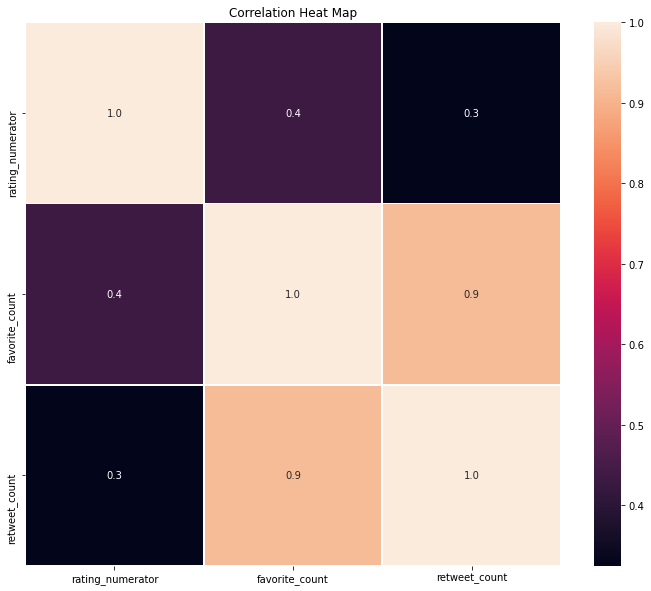

In [75]:
#creating a correlation map
f,ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df[['source','rating_numerator','favorite_count','retweet_count']].corr(),
            annot=True, linewidths=.8, fmt= '.1f',ax=ax)
plt.title('Correlation Heat Map');

#### Analysis

- There is strong correlation(0.9) between favourite_counts and retweet_counts. This is as expected.
- It is surprising that there is low correlation between rating_numerator and retweet_count. This is because, it expected that retweet should be more for high numerator ratings.

### 2. Most common dog life stage in the master data

In [76]:
# Dog life stage and count
df.life_stage.value_counts(normalize=True)

None       0.845646
pupper     0.103904
doggo      0.032432
puppo      0.013213
floofer    0.004805
Name: life_stage, dtype: float64

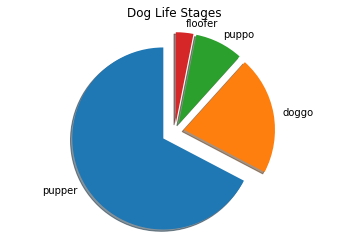

In [77]:
#exploded pie chart plot
life_stage_count = list(df[df['life_stage'] != 'None']['life_stage'].value_counts())[0:8]
life_stages = df[df['life_stage'] != 'None']['life_stage'].value_counts().index.tolist()[0:8]
explode = (0.15, 0.1, 0.09, 0.09) 

figure1, axis1 = plt.subplots()
axis1.pie(life_stage_count, explode = explode, labels = life_stages, shadow = True, startangle = 90)
axis1.axis('equal')
plt.title('Dog Life Stages');

#### Analysis

- Dogs in Pupper stage get most tweets.

### 3. Most Common value for rating (Numerator)

In [78]:
df.rating_numerator.value_counts()

12.00    424
10.00    360
11.00    359
13.00    222
9.00     133
8.00      68
7.00      31
14.00     22
6.00      16
5.00      14
4.00       6
3.00       5
2.00       2
11.27      1
9.75       1
11.26      1
Name: rating_numerator, dtype: int64

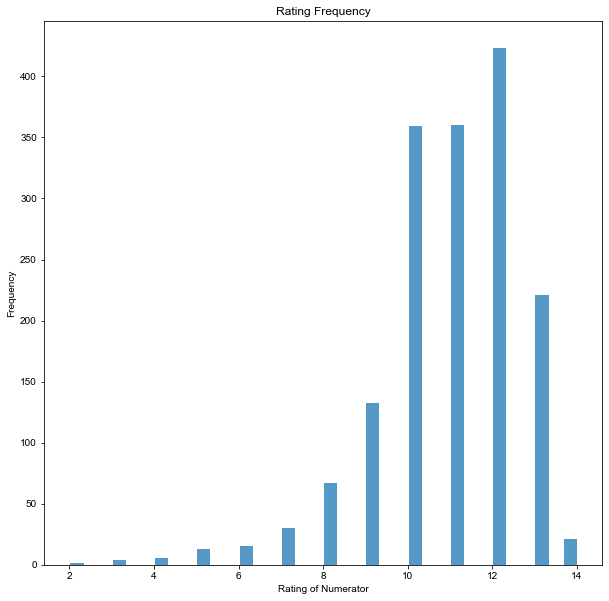

In [79]:
f,ax = plt.subplots(figsize=(10, 10))

sns.set_style('darkgrid')
sns.histplot(df['rating_numerator'], color= sns.color_palette()[0])
plt.xlabel('Rating of Numerator')
plt.ylabel('Frequency')
plt.title('Rating Frequency')
plt.show();

#### Analysis

- The most Dog numerator rating is 12.

### 4. Influence of Source of Tweet to Popularity (retweet count)

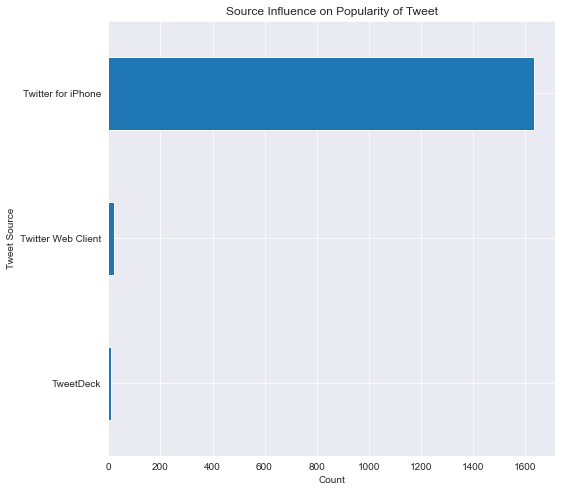

In [80]:
# Plot bar chart for the source and count
f,ax = plt.subplots(figsize=(8, 8))
df.source.value_counts()[10::-1].plot(kind = 'barh', title = 'Source Influence on Popularity of Tweet')
plt.xlabel('Count')
plt.ylabel('Tweet Source');

#### Analysis

- The result should that tweet made by iphone had more retweet counts. Thus, It can be concluded that to have the most engagement, tweet should be made with an iPhone.